In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('wine_fraud.csv')

In [67]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [69]:
#Stastical summary of dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [70]:
#check for null
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [71]:
data.shape

(6497, 13)

In [72]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [73]:
data.duplicated().sum()

1177

In [74]:
data.drop_duplicates(inplace=True)

In [75]:
data.duplicated().sum()

0

In [76]:
#Visualization
c = data['quality'].value_counts()
c

quality
Legit    5084
Fraud     236
Name: count, dtype: int64

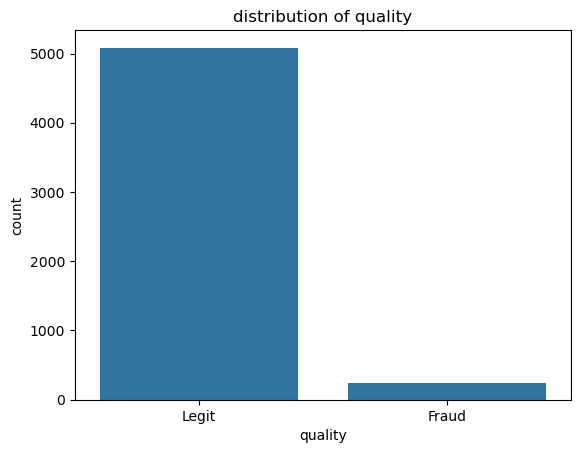

In [77]:
sns.countplot(data, x='quality')
plt.title('distribution of quality')
plt.show()

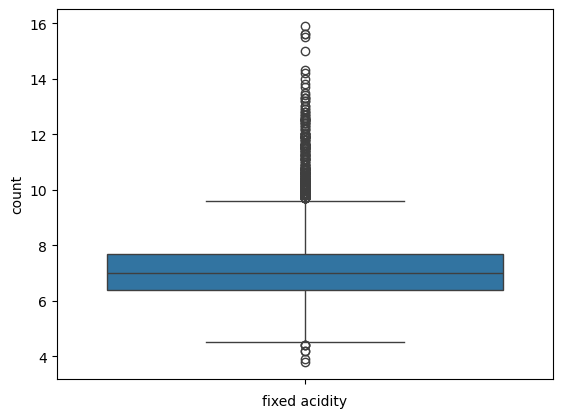

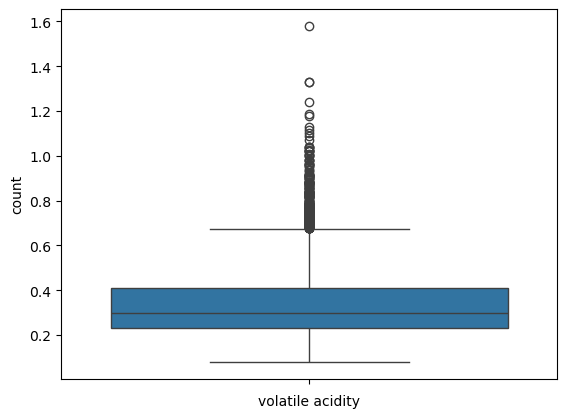

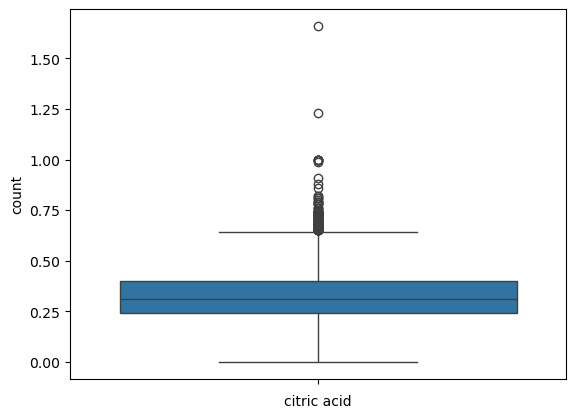

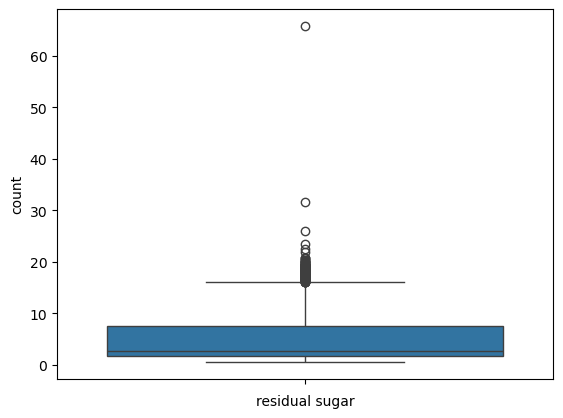

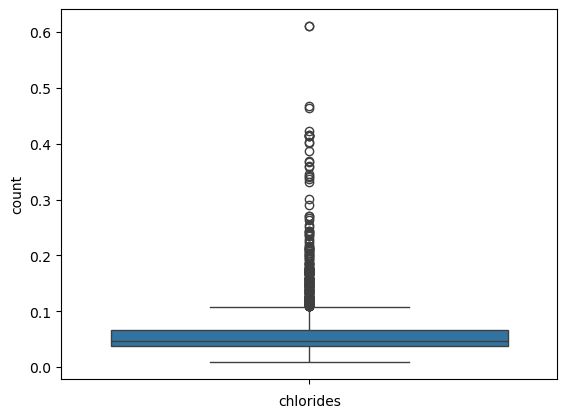

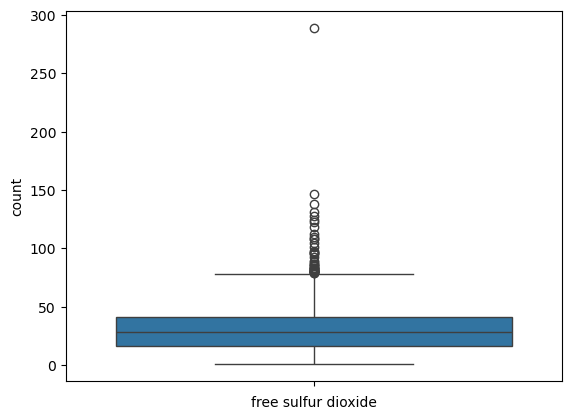

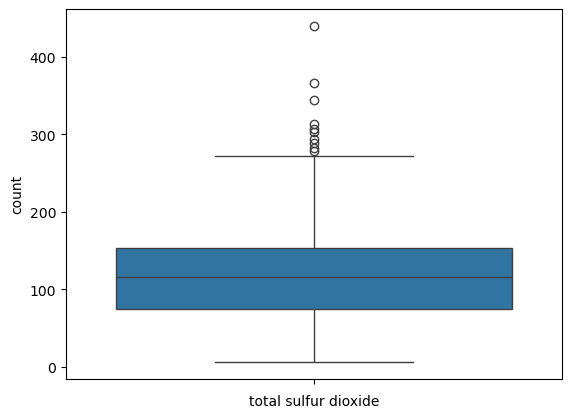

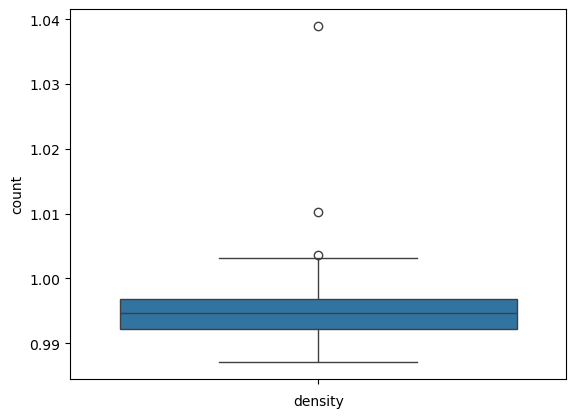

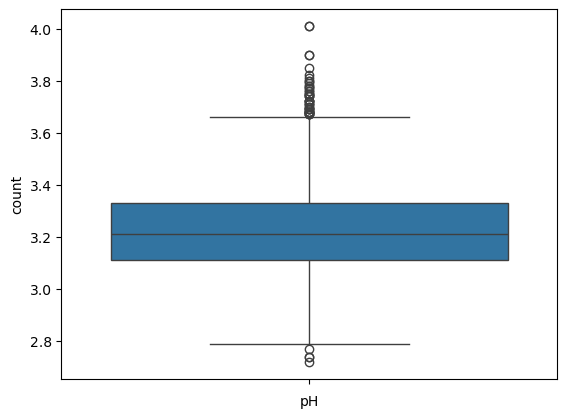

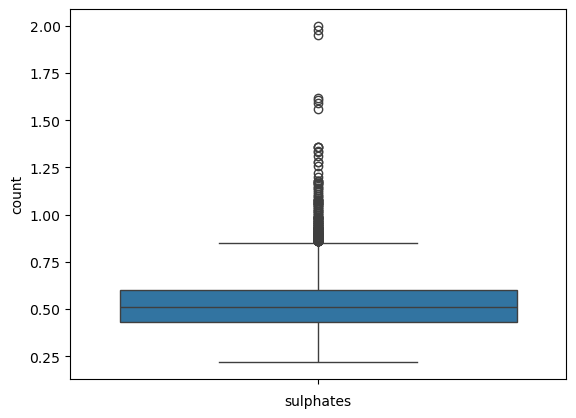

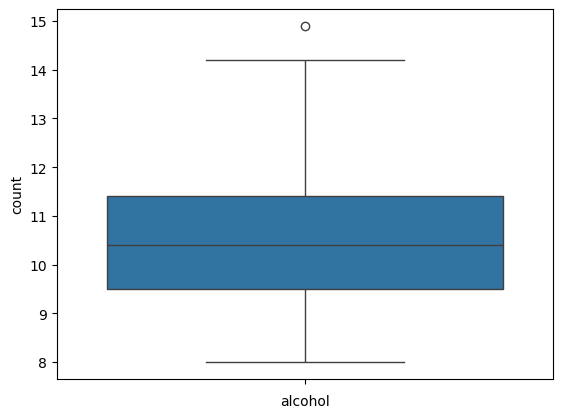

In [78]:
column_name = list(data.columns)
for col in column_name:
 if(data[col].dtypes=='int64' or data[col].dtypes=='float64'):
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

Conculsion -> Outliers are present in almost all the columns -> we keep them We already know -

legit = 5000+

fraud = 236

It is a big imbalance data -> Logistic regression will always predict "legit".

So to fix this , we apply SMOTE later

In [79]:
#convert non-numeric columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data['quality'] = le.fit_transform(data['quality'])

In [80]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [81]:
i = data['quality'].value_counts()
i

quality
1    5084
0     236
Name: count, dtype: int64

In [82]:
x = data.drop('quality', axis = 1)
y = data['quality']

In [83]:
#Train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =0)

SMOTE -> Synthetic Minority Oversampling Technique

It is a method which is used to handle imbalanced datasets.

When one class has very few samples

and the other class has many samples

the model learns only the majority class.

So , to fix this imbalance -> SMOTE creates new minority samples.

In [84]:
# When to Apply SMOTE?
# Your target column is imbalanced
# Classification problem
# Your minority class is very small
# After splitting into train-test
# Before training the model

In [85]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= 34)

In [86]:
#Train test split
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_sm)
x_test_Scaler = scaler.transform(x_test)

In [88]:
#Build Model
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()

In [89]:
le.fit(x_train_scaled, y_train_sm)

LogisticRegression()

In [90]:
y_pred = le.predict(x_test_Scaler)

In [91]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [93]:
#Matrics 

from sklearn.metrics import accuracy_score
print('Accuracy is - ', accuracy_score(y_pred, y_test) * 100)

from sklearn.metrics import precision_score
print('Precision score - ', precision_score(y_pred, y_test) * 100)

from sklearn.metrics import recall_score
print('Recall score - ', recall_score(y_pred, y_test) * 100)

from sklearn.metrics import confusion_matrix
print('confusion_matrix : ', confusion_matrix(y_test, y_pred))

from sklearn.metrics import f1_score
print('F1 score - ', f1_score(y_pred, y_test) * 100)

Accuracy is -  73.1203007518797
Precision score -  73.89162561576354
Recall score -  97.27626459143968
confusion_matrix :  [[ 28  21]
 [265 750]]
F1 score -  83.98656215005599
